In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
from typing import List


exists = lambda filepath: os.path.exists(filepath)
get_dirs = lambda filepath: os.listdir(path=filepath)

def get_benchmarks(main_dir:str) -> List[str]:
	benchmarks_list = []
	if exists(filepath=main_dir):
		list_of_dirs = get_dirs(filepath=main_dir)
		for d in list_of_dirs:
			benchmark_path = os.path.join(main_dir, d, 'fabric_benchmark.csv')
			if os.path.exists(benchmark_path):
				benchmarks_list.append(benchmark_path)
			benchmarks_list = sorted(benchmarks_list)
		return benchmarks_list


In [8]:
def plot_losses(benchmarks_list:List[str]):
	trn_losses = []
	val_losses = []
	epochs = list(range(0, 75))

	for bench_path in benchmarks_list:
		data = pd.read_csv(bench_path)

		# Definiamo i dati per l'asse x e y
		x = data['Unnamed: 0']
		train_loss = data['train_loss']
		val_loss = data['val_loss']

		trn_losses.append(train_loss)
		val_losses.append(val_loss)

		# Creiamo il grafico
		plt.figure(figsize=(20, 10))
		plt.plot(x, train_loss, label='Training Loss')
		plt.plot(x, val_loss, label='Validation Loss')

		# Aggiungiamo etichette e titolo
		plt.xlabel('Epoch')
		plt.ylabel('Loss')
		plt.title('Training vs Validation Loss')
		plt.legend()
		plt.grid(True)

		# Mostriamo il grafico
		plt.show()
	

	# Creiamo il grafico
	plt.figure(figsize=(20, 10))
	for i, t in enumerate(trn_losses):
		plt.plot(epochs, t, label=f'Training Loss #{i+1}')

	# Aggiungiamo etichette e titolo
	plt.xlabel('Epoch')
	plt.ylabel('Loss')
	plt.title('Training Losses')
	plt.legend()
	plt.grid(True)

	# Mostriamo il grafico
	plt.show()

	# Creiamo il grafico
	plt.figure(figsize=(20, 10))
	for i, v in enumerate(val_losses):
		plt.plot(epochs, v, label=f'Validation Loss #{i+1}')

	# Aggiungiamo etichette e titolo
	plt.xlabel('Epoch')
	plt.ylabel('Loss')
	plt.title('Validation Losses')
	plt.legend()
	plt.grid(True)

	# Mostriamo il grafico
	plt.show()




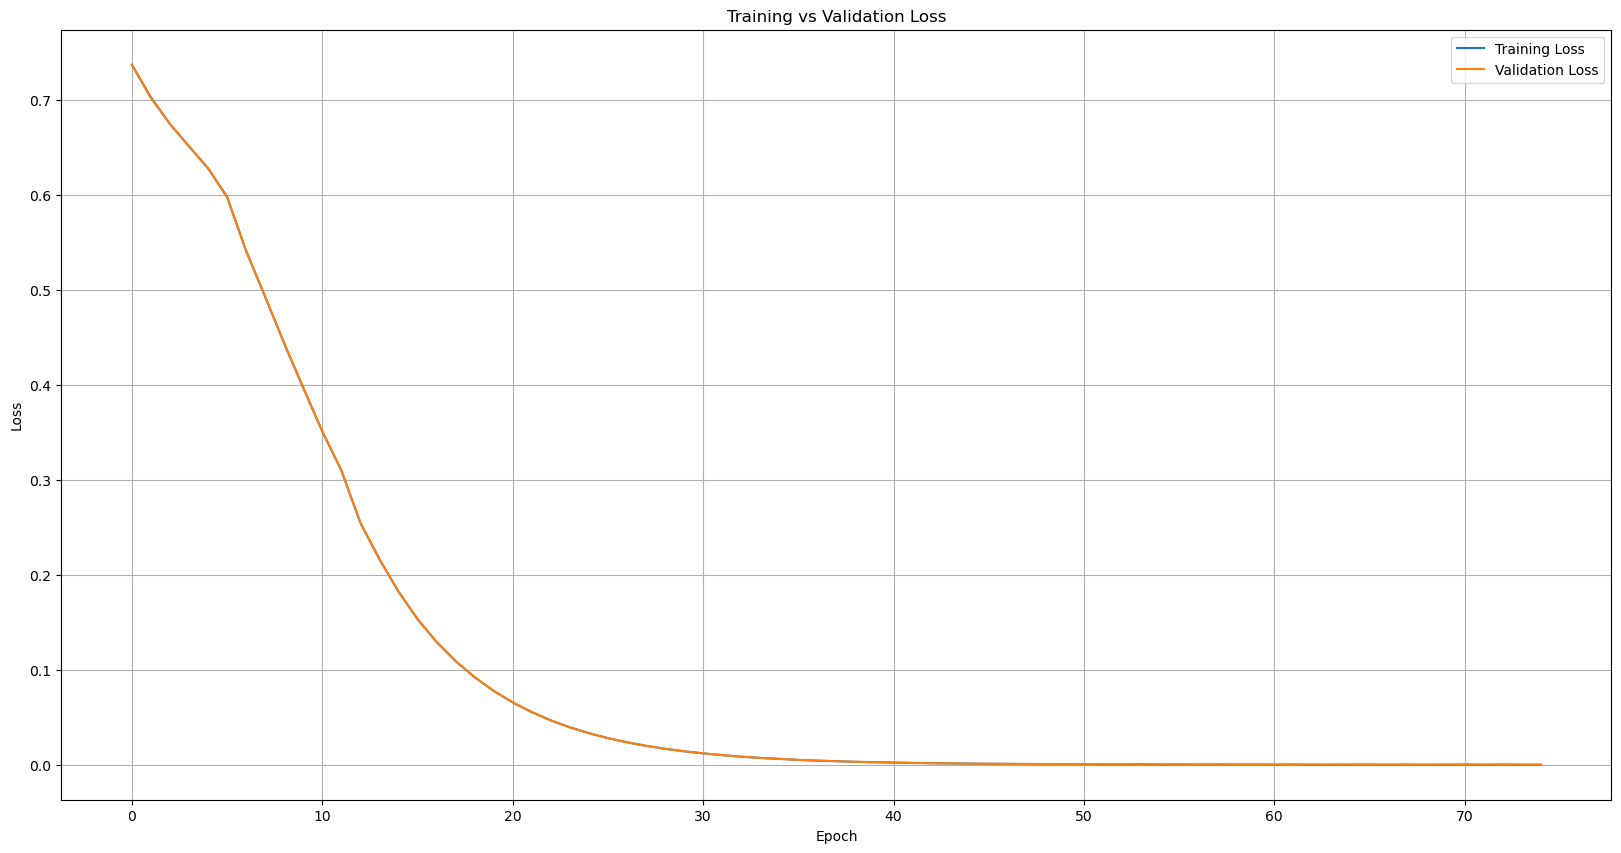

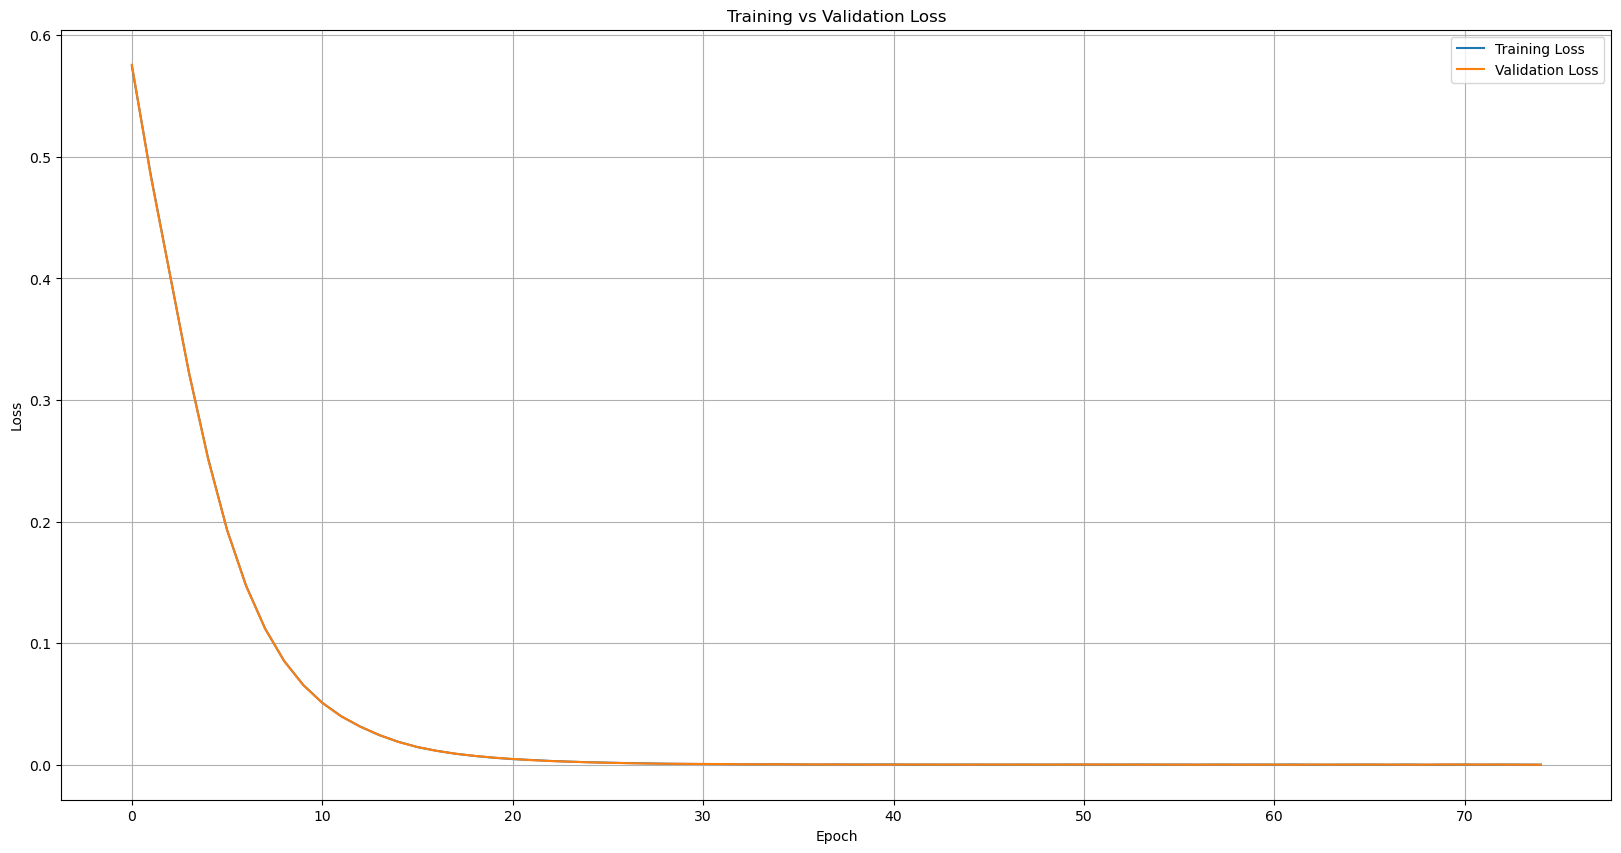

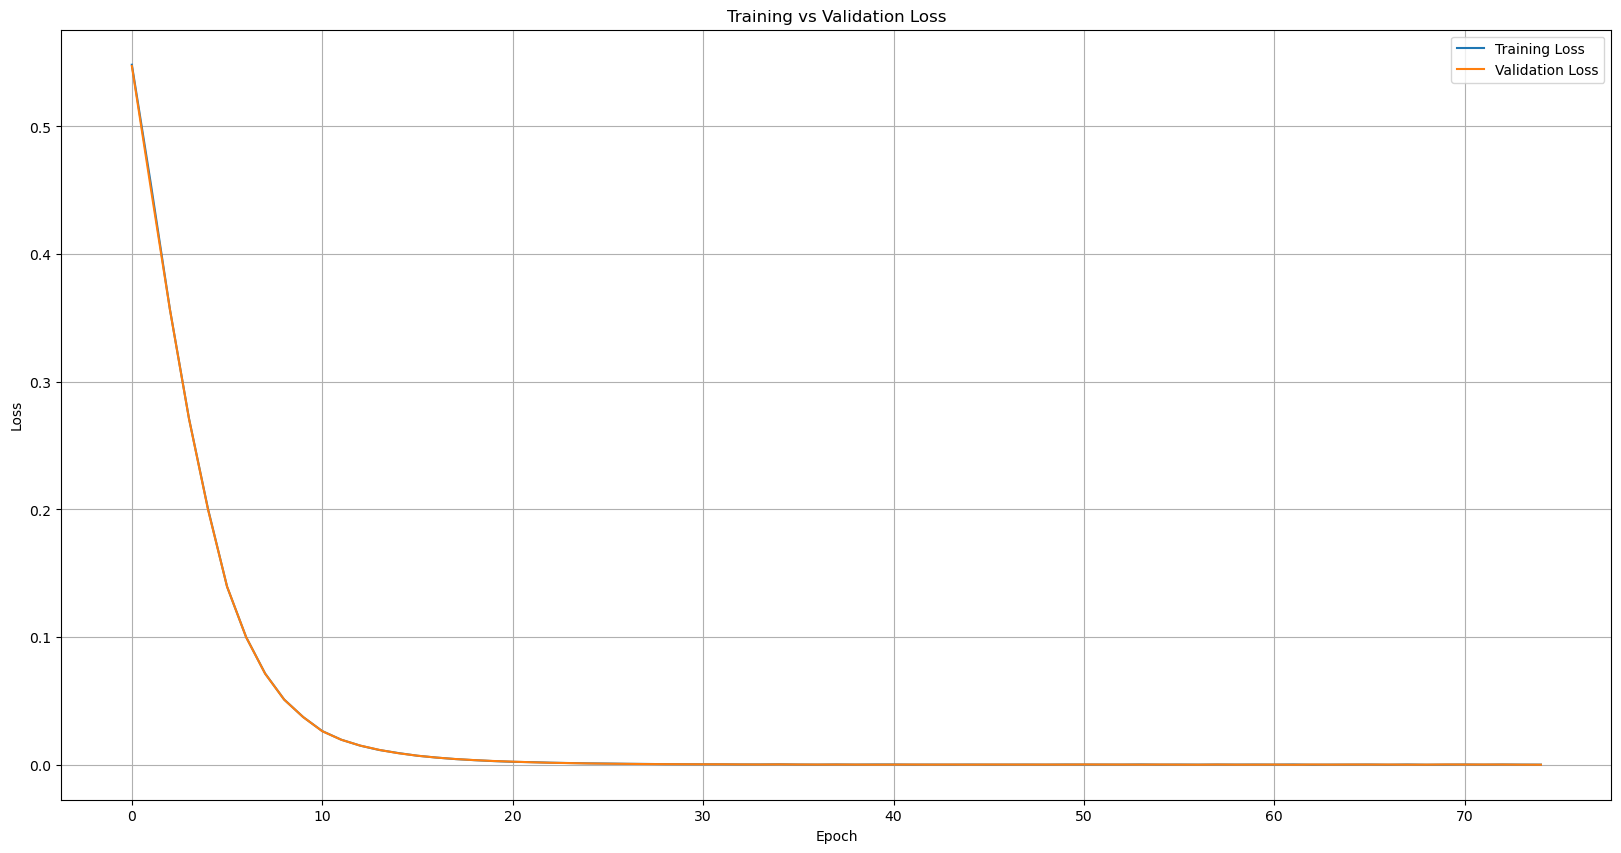

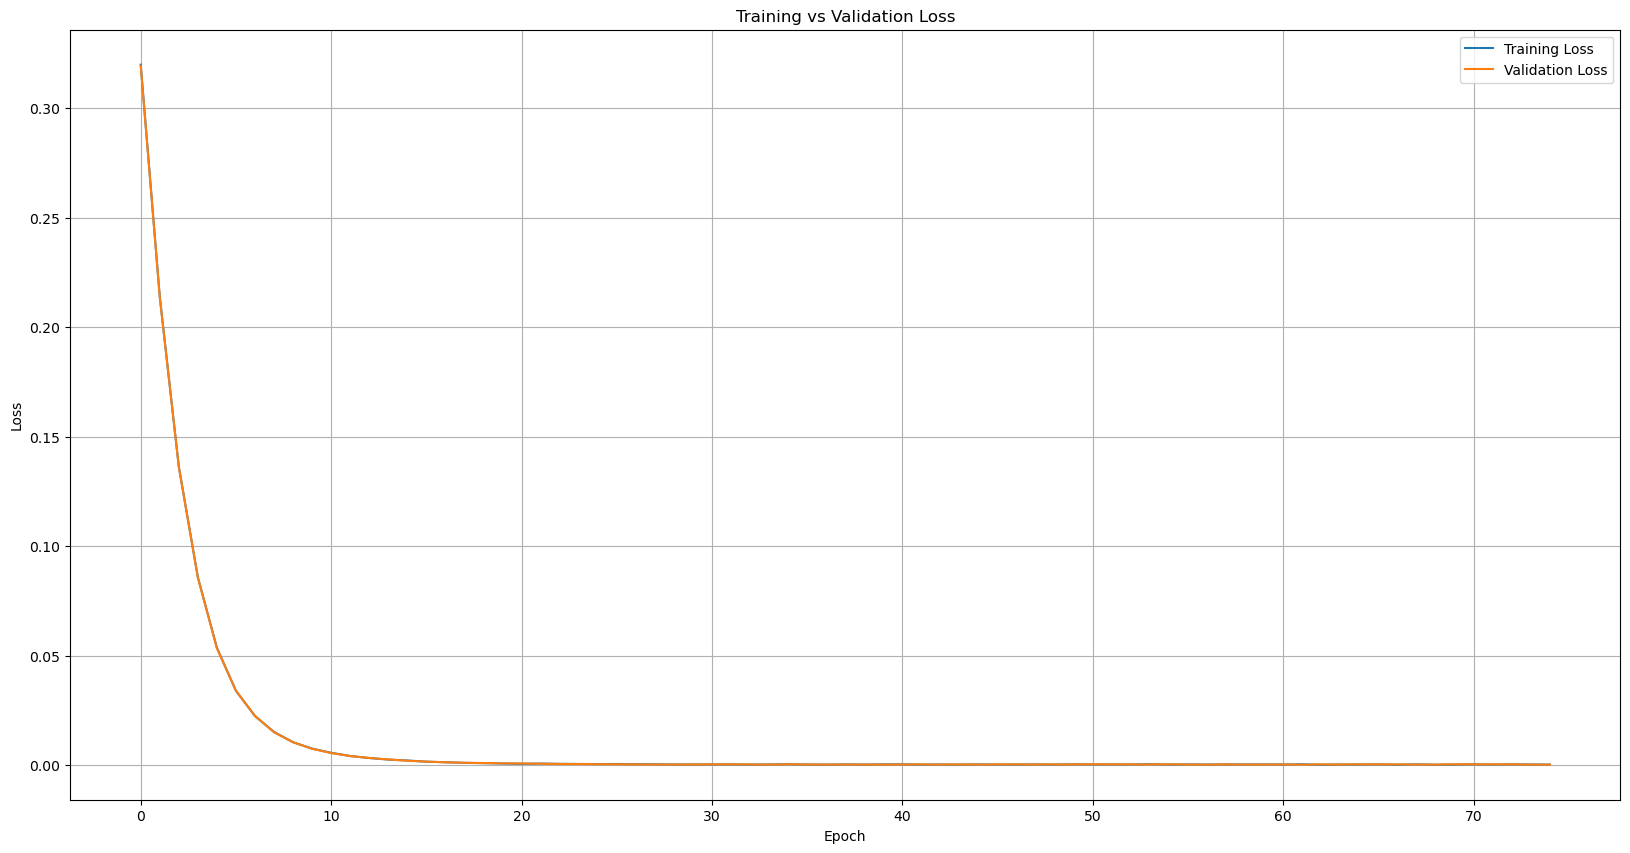

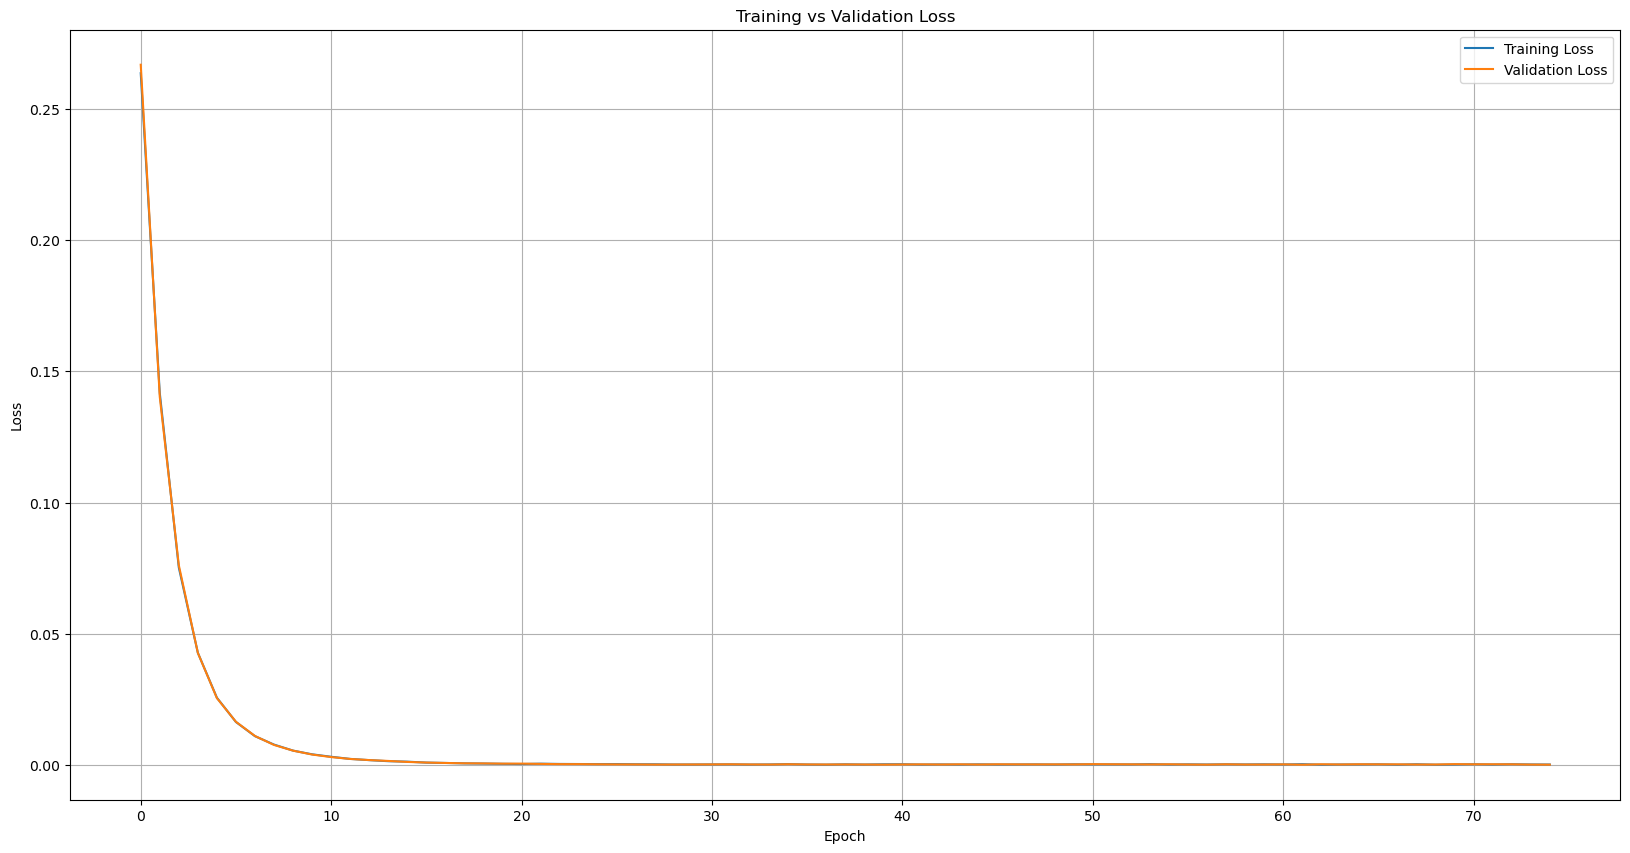

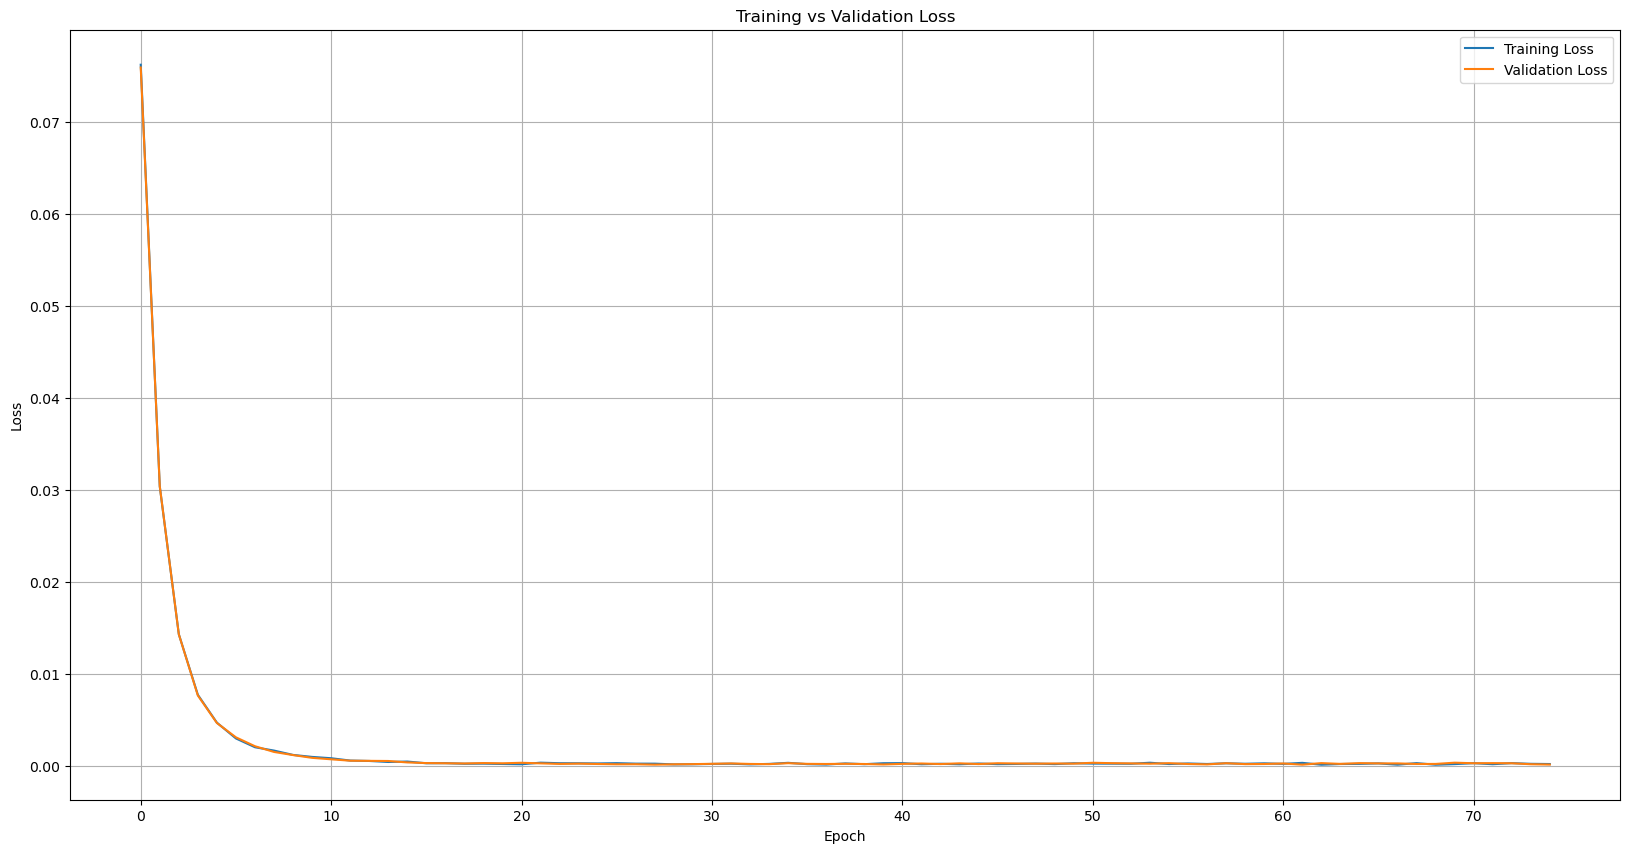

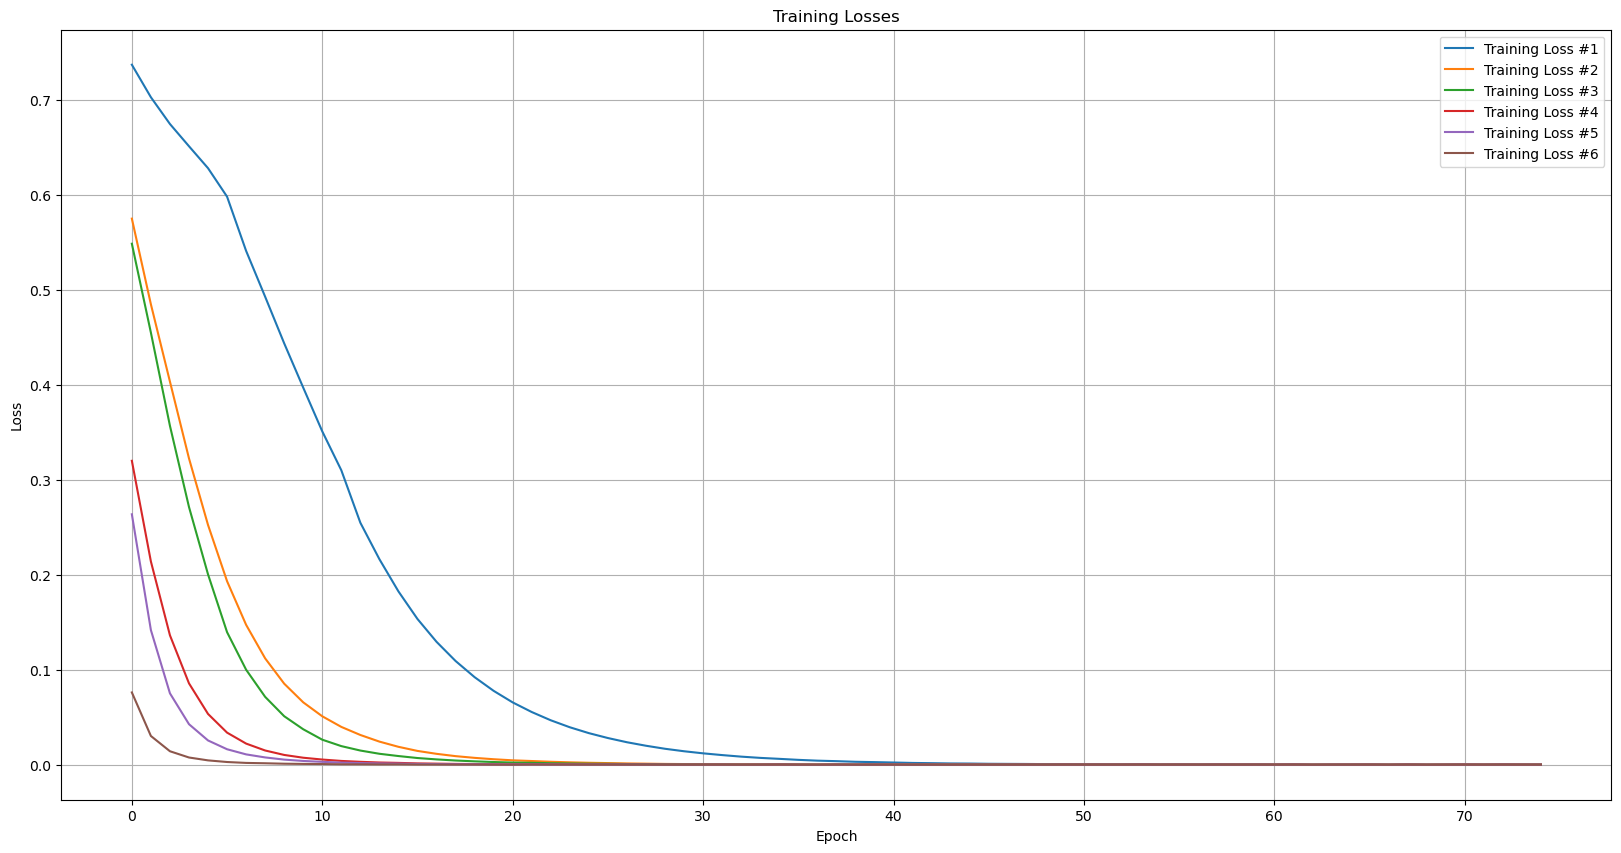

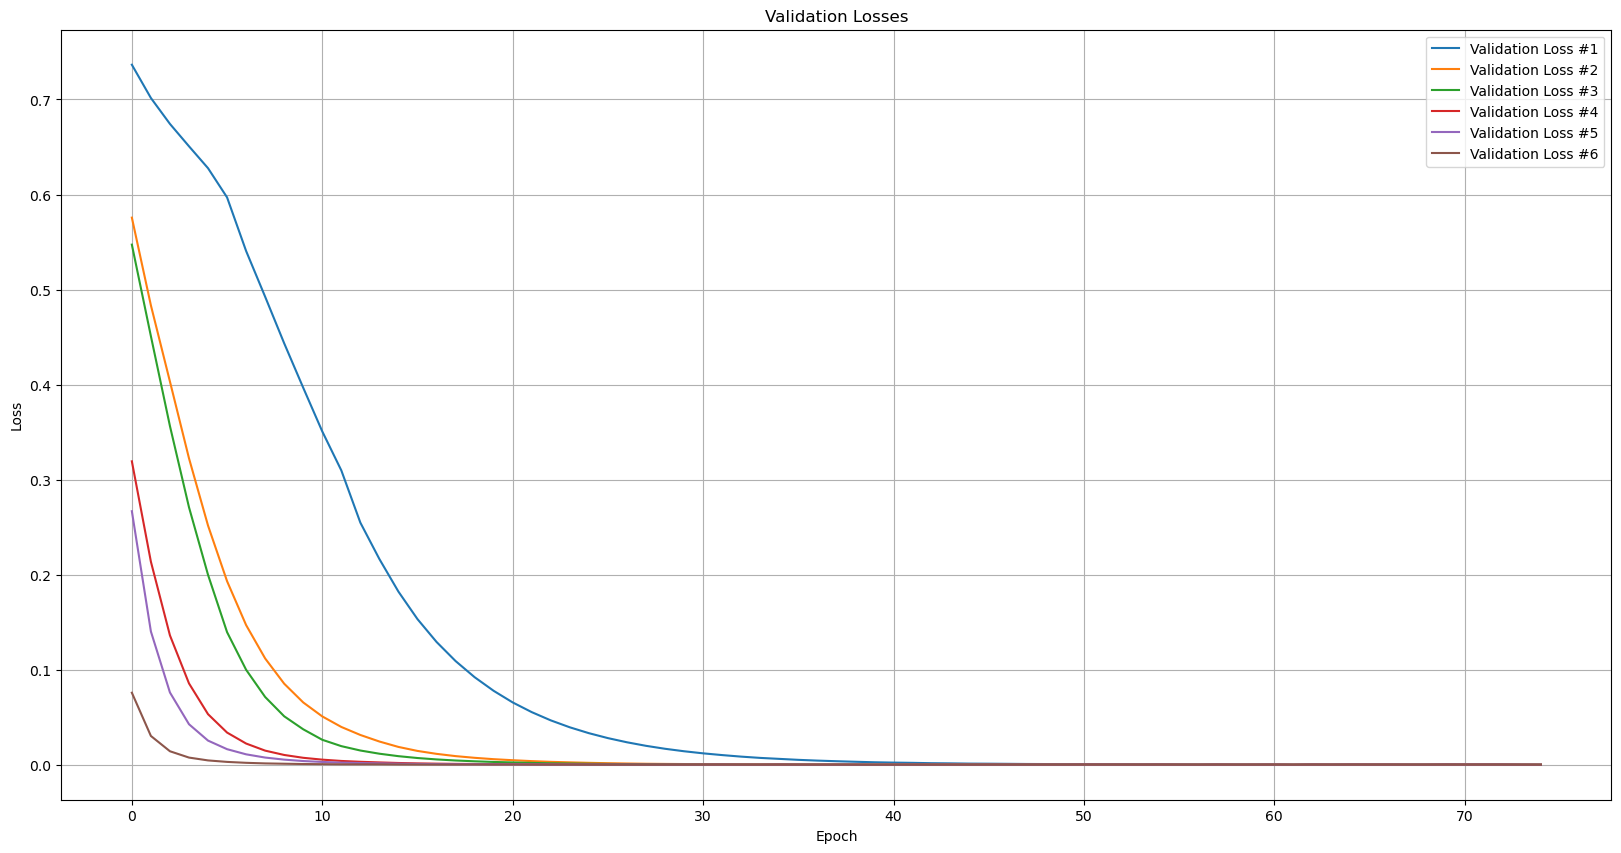

In [9]:
unet_dir = os.path.join(os.getcwd(), 'experiments', '20240918')
benchmarks_list = get_benchmarks(main_dir=unet_dir)
plot_losses(benchmarks_list=benchmarks_list)

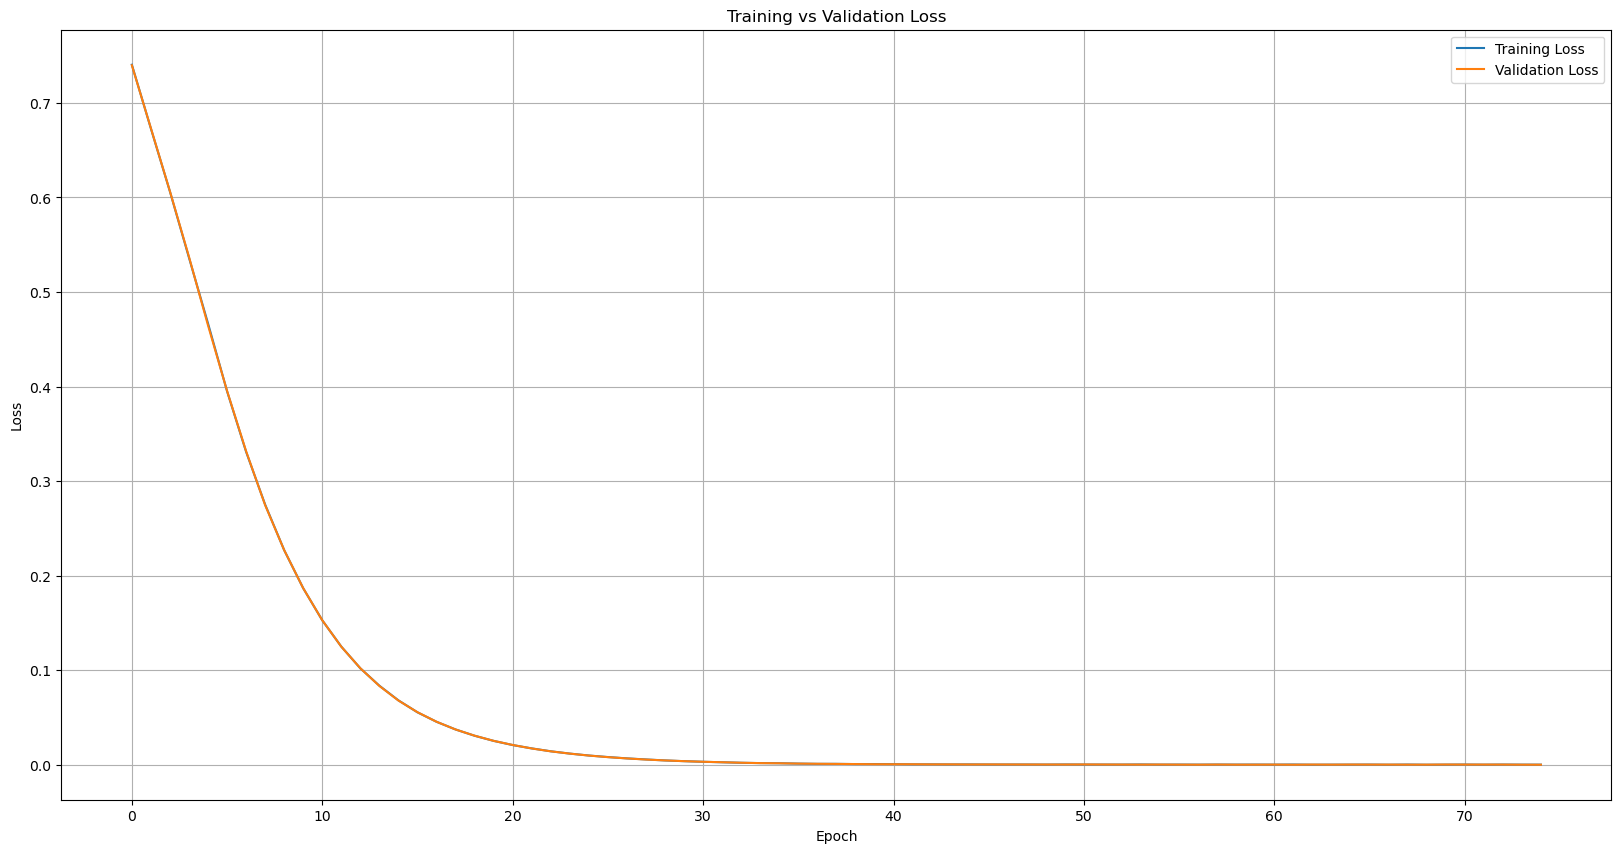

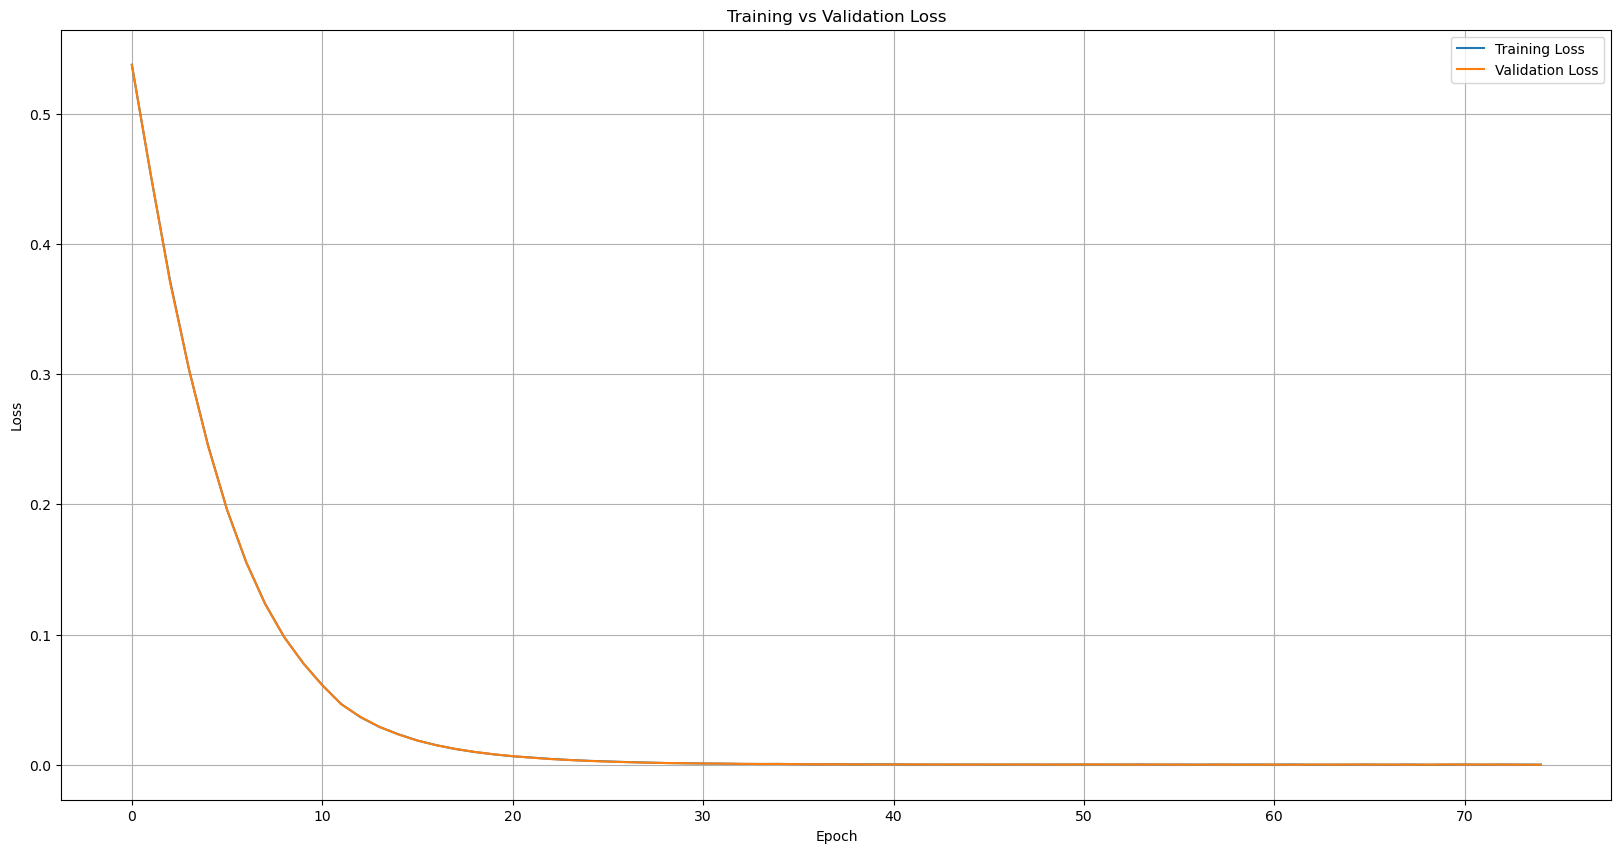

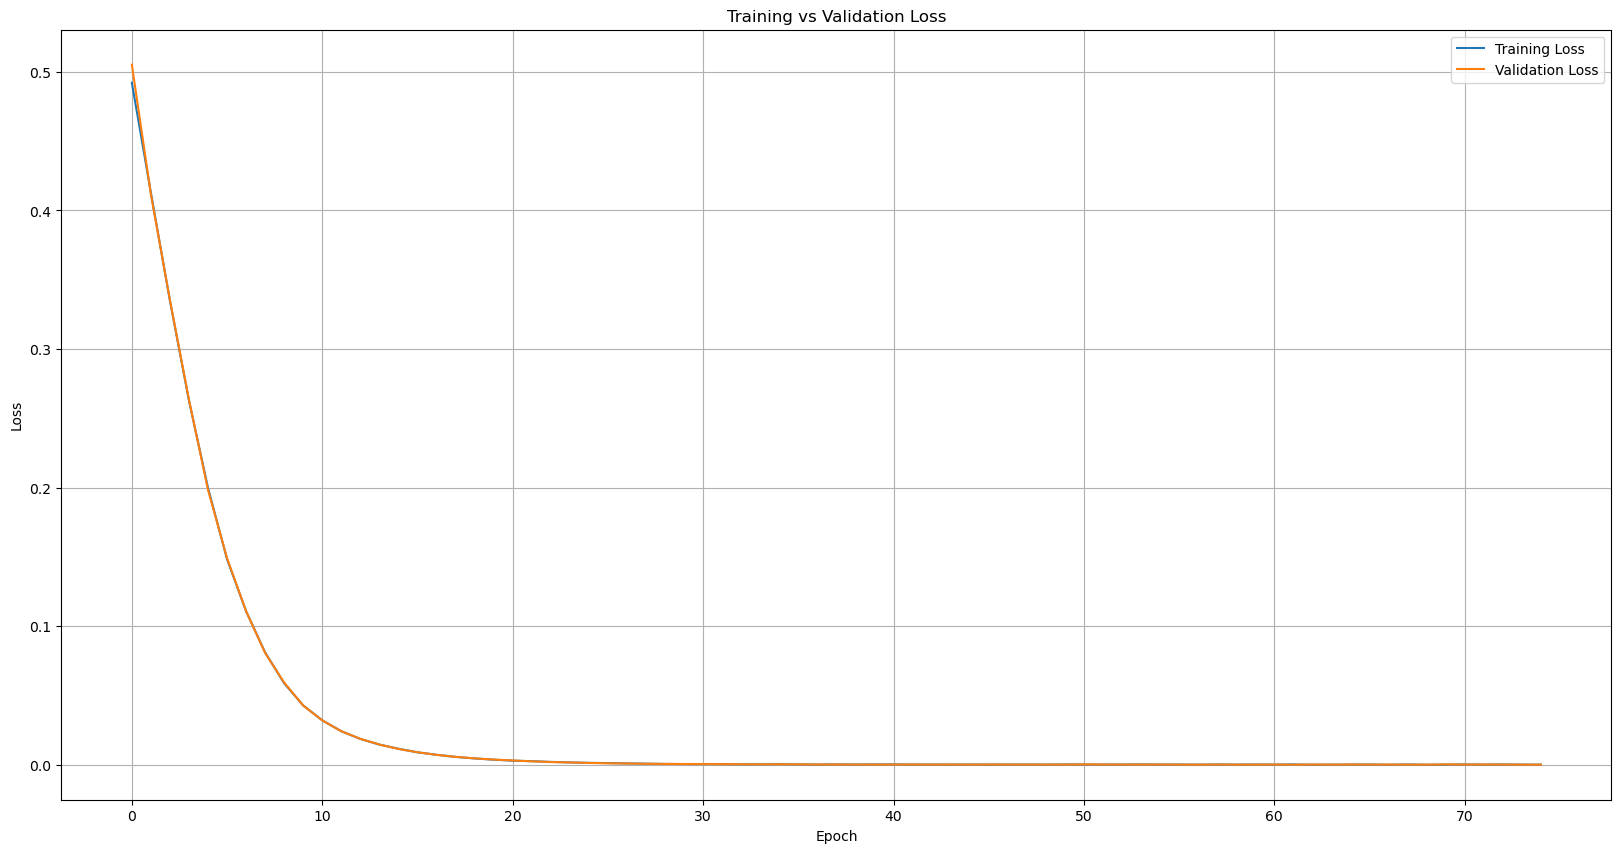

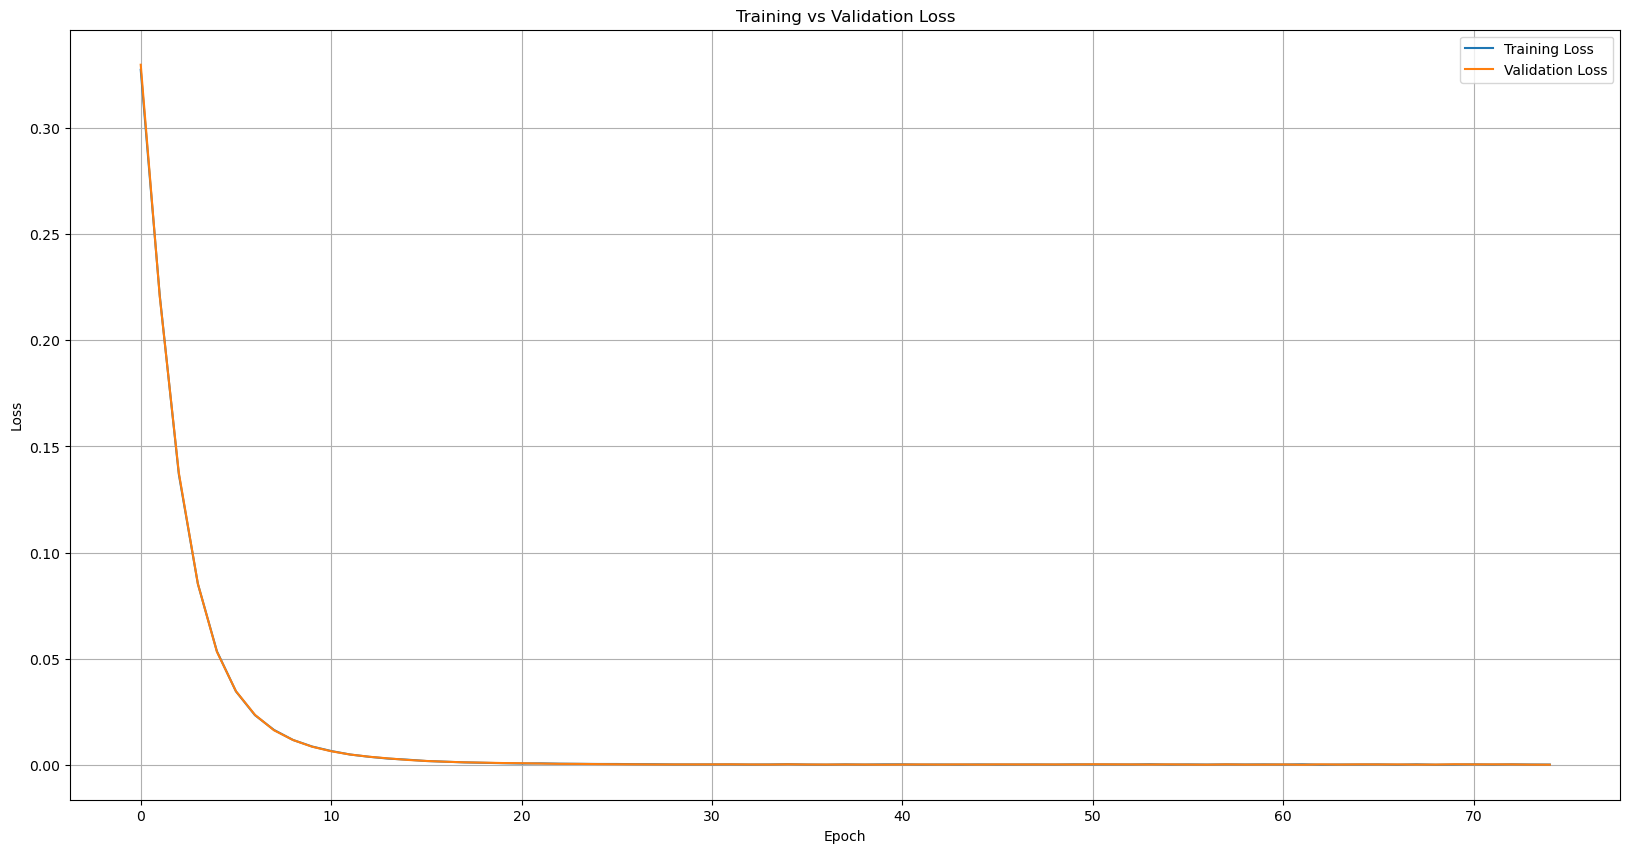

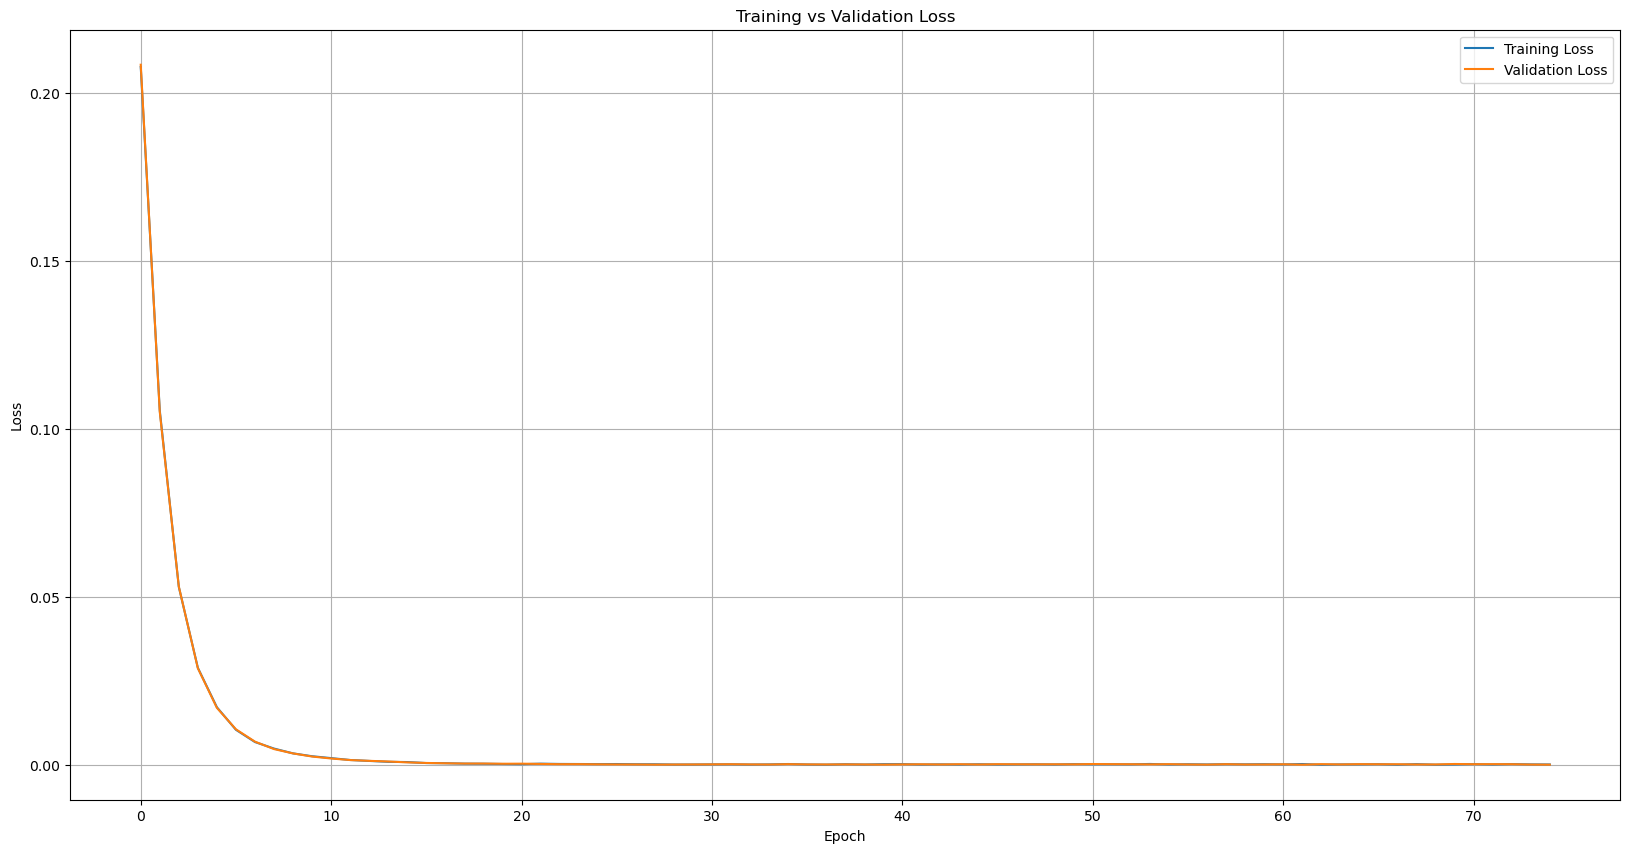

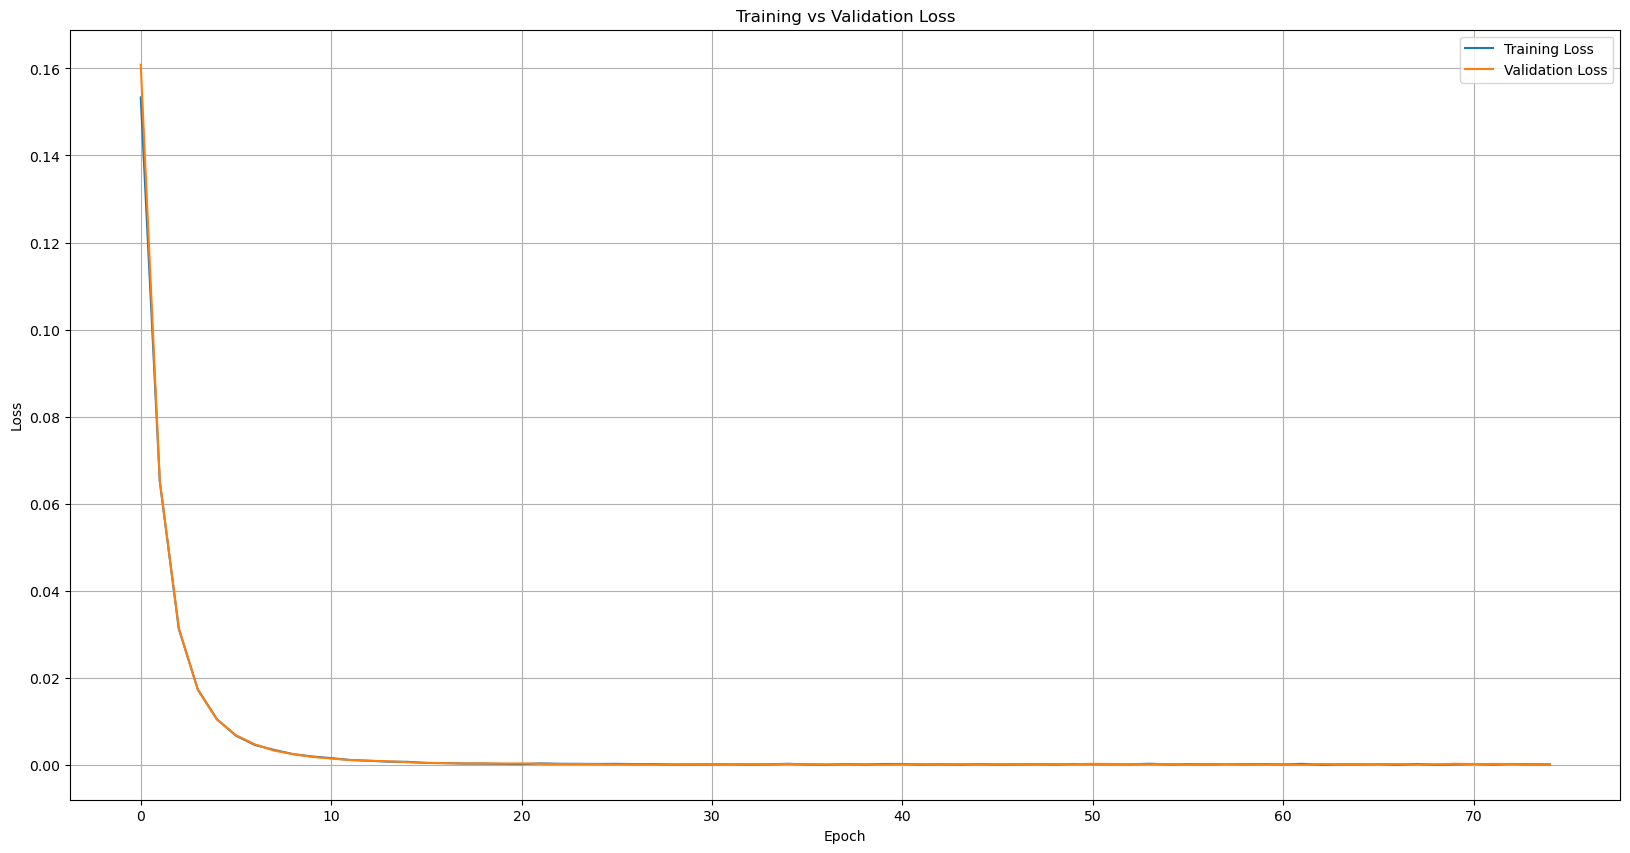

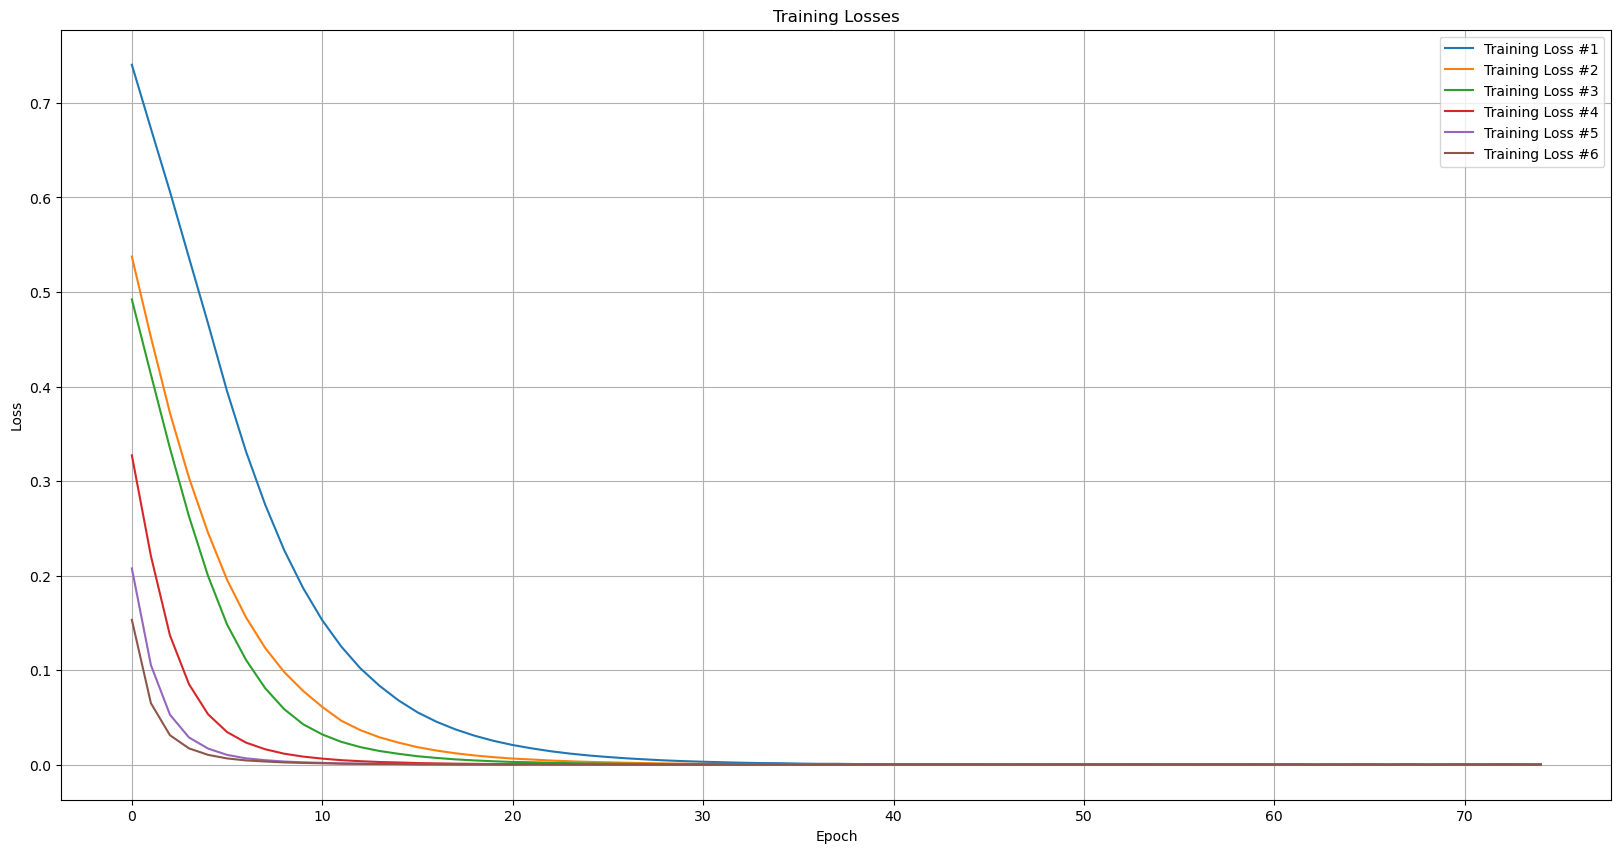

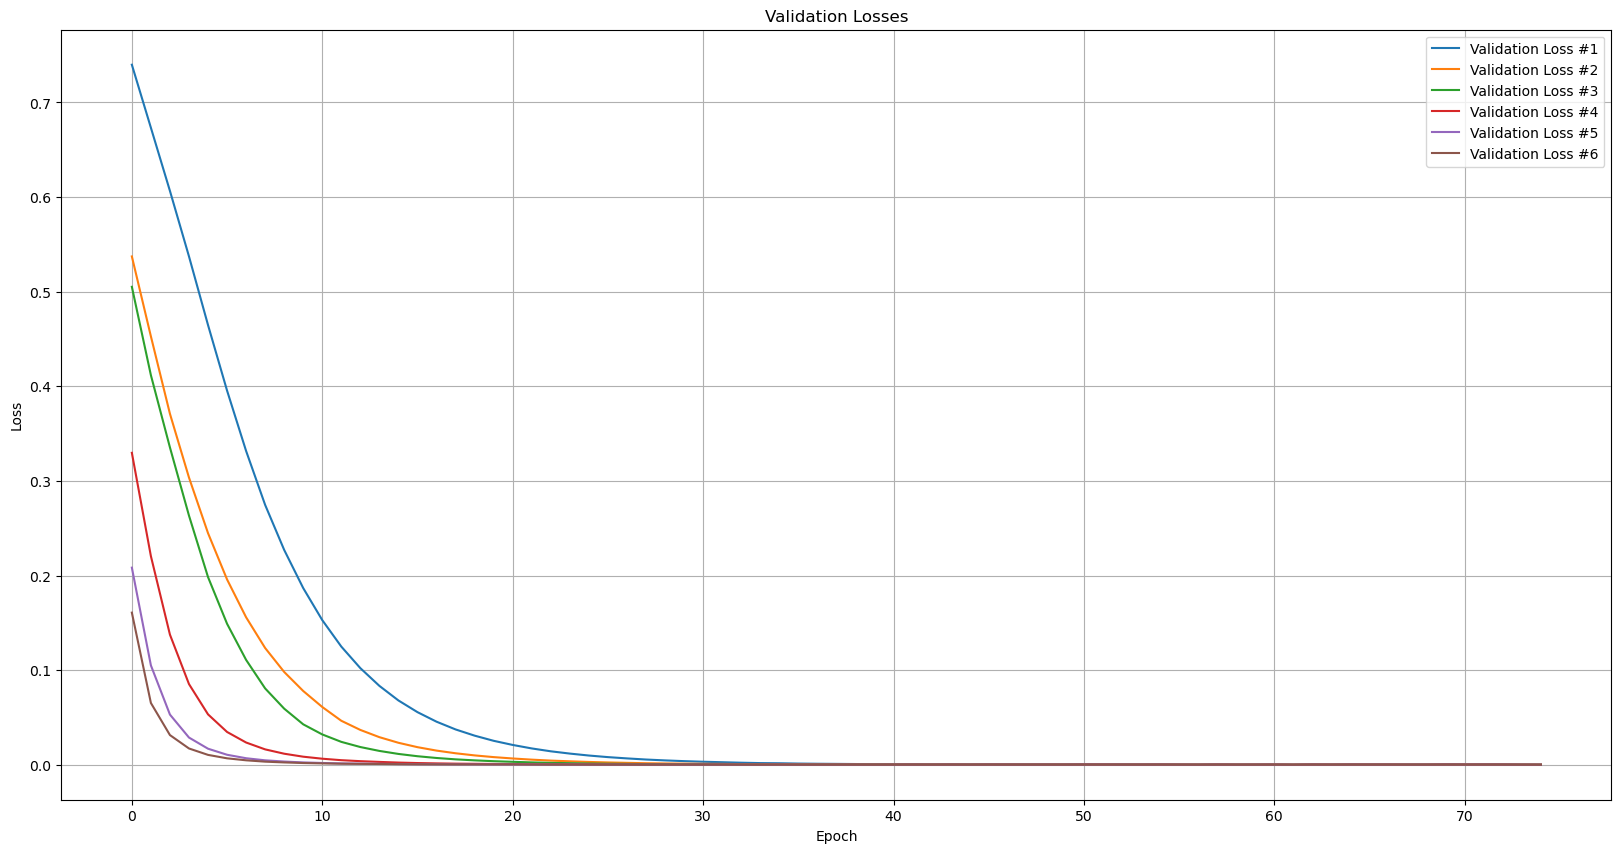

In [10]:
unetpp_dir = os.path.join(os.getcwd(), 'experiments', '20240920_upp')
benchmarks_list = get_benchmarks(main_dir=unetpp_dir)
plot_losses(benchmarks_list=benchmarks_list)